In [27]:
%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Dataset Preparation

#### Loading Data

In [28]:
#read data from given xls ("COVID19 inpatient cases data.xls") (2nd sheet, not first sheet)
xls = pd.ExcelFile('COVID19 inpatient cases data.xls')
data = pd.read_excel(xls, sheet_name="data_reduced")
data.head()
#look the first 5 records of data
data.head(5)

,Gender,Age,Clinical classification,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Clinical outcome,"Hospital stay, days"
0,Male,47,Heavy,15,Y,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,N,"Aggravated,turn to ICU",NaN
1,Female,53,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,6.0
2,Female,57,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Improved and discharge,8.0
3,Male,58,Heavy,1,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,"Aggravated,transfer to superior hospital",NaN
4,Male,54,Ordinary,10,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,5.0


In [29]:
# check column names, not null count and data types 
print(data.info())
data_first = data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Gender                                      73 non-null     object 
 1   Age                                         73 non-null     int64  
 2   Clinical classification                     73 non-null     object 
 3   Days from symptoms to hospital              73 non-null     int64  
 4   No comorbidity                              73 non-null     object 
 5   Cardiovascular and
cerebrovascular disease  73 non-null     object 
 6   Endocrine system disease                    73 non-null     object 
 7   Malignant tumor                             73 non-null     object 
 8   Respiratory system disease                  73 non-null     object 
 9   Digestive system disease                    73 non-null     object 
 10  Renal disease   

#### Dataset preprocessing 

##### Datasets for FIM and Rule extraction

In [30]:
# symptom_cols = data['Fever', 'Cough','Chest tightness', 'Fatigue', 'Diarrhea', 'Others']
# create df_symtoms dataframe including given columns
df_symtoms = pd.DataFrame(data, columns=['Fever', 'Cough','Chest tightness', 'Fatigue', 'Diarrhea', 'Others'])
df_symtoms
# add "Covid19" columns assign all entries as "Y"
df_symtoms.insert(6,'Covid19', ['Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y','Y'], True)
df_symtoms

,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Covid19
0,Y,Y,Y,Y,Y,N,Y
1,Y,Y,Y,N,N,N,Y
2,Y,Y,N,N,N,N,Y
3,N,N,N,N,N,N,Y
4,Y,Y,Y,N,N,N,Y
...,...,...,...,...,...,...,...
68,Y,Y,N,N,N,N,Y
69,N,Y,N,Y,N,N,Y
70,N,Y,N,N,N,N,Y
71,Y,Y,N,N,N,N,Y


In [31]:
disease_cols = ['Cardiovascular and\ncerebrovascular disease', 'Endocrine system disease','Malignant tumor','Respiratory system disease', 
                'Digestive system disease','Renal disease','Liver disease']
other_cols= ['Age','Gender']
# create df_diseases dataframe consisting records of given cols(disease_cols and other_cols) from main dataframe
df_diseases = pd.DataFrame(data, columns=disease_cols+other_cols)
print(df_diseases)
# add also "Clinicial classification" attribute from main dataframe calling  this column as "Illness" in your df_diseases dataframe
# add " ill" string to all records in "illness" attribute 
df_diseases = df_diseases.assign(illness=data['Clinical classification'])

   Cardiovascular and\ncerebrovascular disease Endocrine system disease  \
0                                            N                        N   
1                                            N                        N   
2                                            N                        N   
3                                            N                        Y   
4                                            N                        N   
..                                         ...                      ...   
68                                           N                        N   
69                                           N                        Y   
70                                           Y                        N   
71                                           Y                        N   
72                                           Y                        N   

   Malignant tumor Respiratory system disease Digestive system disease  \
0                N       

In [32]:
# categorize ages as "Elderly" (Age>=65), 
#                        "Adults" (18<= Age <65),
#                        "Teens" (12=<Age<18),
#                        "Children" (1<Age<11), 
#                        "Infants" (Age<=1)
# in new column "Age Group", drop "Age" column in df_disease dataframe.
bins = [0,2,12,18,65,200]
labels = ['Infants','Children','Teens','Adults','Elderly']
df_diseases = df_diseases.assign(Age_Group = pd.cut(df_diseases['Age'], bins = bins, labels = labels))
df_diseases = df_diseases.drop(['Age'], axis=1)
df_diseases.head()

,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Gender,illness,Age_Group
0,N,N,N,N,N,N,N,Male,Heavy,Adults
1,N,N,N,N,N,N,N,Female,Ordinary,Adults
2,N,N,N,N,N,N,N,Female,Ordinary,Adults
3,N,Y,N,N,N,N,N,Male,Heavy,Adults
4,N,N,N,N,N,N,N,Male,Ordinary,Adults


In [33]:
# Convert "Gender", "Illness", "Age Group" attributes to dummies for one-hot encoding, \
gender_dummies = pd.get_dummies(df_diseases['Gender'], prefix = 'Gender')
illness_dummies = pd.get_dummies(df_diseases['illness'], prefix = 'Illness')
age_group_dummies = pd.get_dummies(df_diseases['Age_Group'], prefix = 'Age_Group')
print(gender_dummies)
#print(illness_dummies)
print(age_group_dummies)
#  then drop these attributes from df_diseases
df_diseases = df_diseases.drop(['Gender'], axis=1)
df_diseases = df_diseases.drop(['illness'], axis=1)
df_diseases = df_diseases.drop(['Age_Group'], axis=1)
df_diseases.head()

    Gender_Female  Gender_Male
0               0            1
1               1            0
2               1            0
3               0            1
4               0            1
..            ...          ...
68              1            0
69              1            0
70              1            0
71              1            0
72              1            0

[73 rows x 2 columns]
    Age_Group_Infants  Age_Group_Children  Age_Group_Teens  Age_Group_Adults  \
0                   0                   0                0                 1   
1                   0                   0                0                 1   
2                   0                   0                0                 1   
3                   0                   0                0                 1   
4                   0                   0                0                 1   
..                ...                 ...              ...               ...   
68                  0                   0    

,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease
0,N,N,N,N,N,N,N
1,N,N,N,N,N,N,N
2,N,N,N,N,N,N,N
3,N,Y,N,N,N,N,N
4,N,N,N,N,N,N,N


In [34]:
# convert all data to bool (True or False) (by replacing or mapping attribute values ) for df_symptoms dataframe
for column_name in df_symtoms.columns:
    df_symtoms[column_name] = df_symtoms[column_name].map({'Y': True, 'N':False})
    
df_symtoms.head()

,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Covid19
0,True,True,True,True,True,False,True
1,True,True,True,False,False,False,True
2,True,True,False,False,False,False,True
3,False,False,False,False,False,False,True
4,True,True,True,False,False,False,True


In [35]:
# same for df_diseases dataframe
for column_name in df_diseases.columns:
    df_diseases[column_name] = df_diseases[column_name].map({'Y':True, 'N':False})
df_diseases.head()

,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False


In [42]:
# install mlxtend library (suggested version is 0.15.0.0)
# pip install mlxtend==0.15.0.0

In [36]:
# create "df_symptoms_extended" concatanating df_symptoms with df_diseases dummy attributes of "Gender", "Illness", "Age Group" and their records.
concat1 = pd.concat([df_symtoms, gender_dummies], axis=1)
concat2 = pd.concat([concat1, illness_dummies], axis=1)
df_symptoms_extended_temp = pd.concat([concat2, age_group_dummies], axis=1)
# drop "Covid19" attribute in extended dataframe
df_symptoms_extended = df_symptoms_extended_temp.drop(['Covid19'], axis=1)
df_symptoms_extended.head()

,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Gender_Female,Gender_Male,Illness_Heavy,Illness_Ordinary,Age_Group_Infants,Age_Group_Children,Age_Group_Teens,Age_Group_Adults,Age_Group_Elderly
0,True,True,True,True,True,False,0,1,1,0,0,0,0,1,0
1,True,True,True,False,False,False,1,0,0,1,0,0,0,1,0
2,True,True,False,False,False,False,1,0,0,1,0,0,0,1,0
3,False,False,False,False,False,False,0,1,1,0,0,0,0,1,0
4,True,True,True,False,False,False,0,1,0,1,0,0,0,1,0


#### Fill mising values with KNN

The usage of KNNImputer is not allowed.

In [37]:
# show missing record as (number of missings/total) (should be only "Hospital stay, days") 
for column_name in data.columns:
    if(data[column_name].isnull().values.any()):
        x=str(data[column_name].isnull().sum())
        y=str(len(data[column_name]))
        print("There is missing values in "+ column_name + " column!: "+ x +"/"+y+ " (missing/total)")

There is missing values in Hospital stay, days column!: 4/73 (missing/total)


In [38]:
# copy dataframe df1 to df2 
df2 = data.copy()
# convert bools and strings to numeric attributes ('Male':1, 'Female':2, 'Heavy':1, 'Ordinary':2, 'Y':1, 'N':0)
df2['Gender'].replace(('Male', 'Female'), (1, 2), inplace=True)
df2['Clinical classification'].replace(('Heavy', 'Ordinary'), (1, 2), inplace=True)
df2.replace({'No comorbidity': {'Y': 1, 'N': 0}, 'Cardiovascular and\ncerebrovascular disease': {'Y': 1, 'N': 0},
             'Endocrine system disease': {'Y': 1, 'N': 0}, 'Malignant tumor': {'Y': 1, 'N': 0},
             'Respiratory system disease': {'Y': 1, 'N': 0},'Digestive system disease': {'Y': 1, 'N': 0},
             'Renal disease': {'Y': 1, 'N': 0},'Liver disease': {'Y': 1, 'N': 0},'Fever': {'Y': 1, 'N': 0},
             'Cough': {'Y': 1, 'N': 0}, 'Covid19': {'Y': 1, 'N': 0},'Chest tightness': {'Y': 1, 'N': 0},
             'Fatigue': {'Y': 1, 'N': 0},'Diarrhea': {'Y': 1, 'N': 0}, 'Others': {'Y': 1, 'N': 0} })

,Gender,Age,Clinical classification,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Clinical outcome,"Hospital stay, days"
0,1,47,1,15,1,0,0,0,0,0,0,0,1,1,1,1,1,0,"Aggravated,turn to ICU",NaN
1,2,53,2,13,1,0,0,0,0,0,0,0,1,1,1,0,0,0,Improved and discharge,6.0
2,2,57,2,13,1,0,0,0,0,0,0,0,1,1,0,0,0,0,Improved and discharge,8.0
3,1,58,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,"Aggravated,transfer to superior hospital",NaN
4,1,54,2,10,1,0,0,0,0,0,0,0,1,1,1,0,0,0,Improved and discharge,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2,30,2,13,1,0,0,0,0,0,0,0,1,1,0,0,0,0,Improved and discharge,24.0
69,2,59,2,10,0,0,1,0,0,0,0,0,0,1,0,1,0,0,Improved and discharge,16.0
70,2,87,2,10,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Improved and discharge,14.0
71,2,56,2,20,0,1,0,0,0,0,0,0,1,1,0,0,0,0,Improved and discharge,12.0


In [39]:
def min_max_scale(df):
    X = df['Hospital stay,days']
    X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    return  X_scaled
def inv_min_max_scale(df, scaled_val):
    inv_df = (scaled_val * (max(df) - min(df))) + min(df)
    return inv_df

In [14]:
# min_max_scale for scaling missing atttribute (you will need for "nan" values)

# scale other nonmissing attributes using MinMaxScaler in sklearn

# fill missing values based on KNeighborsRegressor regression in sklearn (for k=7)

# don't forget to convert original range

# fill df1 missings with given values


#### Dataset for classification task

In [40]:
import warnings 
warnings.filterwarnings('ignore')
# copy df1 to data_df datafarme
data_df = data.copy()
# split data: label attribute 'Clinical classification' as Y, features as X (including nonmissing features)
data_df['Clinical classification'].replace(('Heavy', 'Ordinary'), (1, 0), inplace=True)
X = data_df[['Gender','Fever','Cough','Renal disease', 'Chest tightness', 'Diarrhea', 'Fatigue', 'Others']]
Y = data_df['Clinical classification']
X.head()
# convert attribute values to 0 and 1 ('Y':1, 'N':0, 'Male':0, "Female":1)
X['Gender'].replace(('Male', 'Female'), (0, 1), inplace=True)
X = X.replace({'Fever': {'Y': 1, 'N': 0} })
X = X.replace({'Cough': {'Y': 1, 'N': 0} })
X = X.replace({'Renal disease': {'Y': 1, 'N': 0} })
X = X.replace({'Chest tightness': {'Y': 1, 'N': 0} })
X = X.replace({'Diarrhea': {'Y': 1, 'N': 0} })
X = X.replace({'Fatigue': {'Y': 1, 'N': 0} })
X = X.replace({'Others': {'Y': 1, 'N': 0} })
X.head()

,Gender,Fever,Cough,Renal disease,Chest tightness,Diarrhea,Fatigue,Others
0,0,1,1,0,1,1,1,0
1,1,1,1,0,1,0,0,0
2,1,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0


In [41]:
# Split dataset as train and test set using sklearn (for random_state=44) 
# x_train, x_val, y_test, y_test = # to-do
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=44)

### Apriori Part: Frequent Itemset Mining, Association Rule Extraction 

In [42]:
import mlxtend
from mlxtend.frequent_patterns import apriori

In [43]:
# find itemsets for df_symptoms data with min support=0.02 
# df_ap = # to-do
df_ap = apriori(df_symtoms, min_support = 0.02)
print(df_ap)

     support         itemsets
0   0.753425              (0)
1   0.753425              (1)
2   0.287671              (2)
3   0.136986              (3)
4   0.109589              (4)
..       ...              ...
66  0.027397     (1, 3, 4, 6)
67  0.027397     (1, 3, 5, 6)
68  0.054795  (0, 1, 2, 3, 6)
69  0.027397  (0, 1, 3, 4, 6)
70  0.027397  (0, 1, 3, 5, 6)

[71 rows x 2 columns]


In [44]:
# find itemsets for df_symptoms_extended data with min support=0.02 
# df_ap_extended = # to-do
df_ap_extended = apriori(df_symptoms_extended, min_support = 0.02)
print(df_ap_extended)

       support                itemsets
0     0.753425                     (0)
1     0.753425                     (1)
2     0.287671                     (2)
3     0.136986                     (3)
4     0.109589                     (4)
..         ...                     ...
431  0.0273973     (0, 1, 5, 6, 9, 13)
432  0.0410959     (0, 2, 3, 6, 8, 13)
433  0.0273973     (0, 4, 5, 6, 9, 13)
434  0.0410959     (1, 2, 3, 6, 8, 13)
435  0.0410959  (0, 1, 2, 3, 6, 8, 13)

[436 rows x 2 columns]


In [45]:
# find itemsets for df_diseases data with min support=0.02 
# df_ap_diseases = # to-do
df_ap_diseases = apriori(df_diseases, min_support = 0.02)
print(df_ap_diseases)

    support itemsets
0  0.273973      (0)
1  0.136986      (1)
2  0.054795      (2)
3  0.054795   (0, 1)


In [46]:
from mlxtend.frequent_patterns import association_rules
# use mlxtend for generating association rules from symptoms itemset  (with min confidence =0.6)
# show rules with min support= 0.2
# rules0 = #to-do
df_ap1 = apriori(df_symtoms, min_support = 0.2)
rules0 = association_rules(df_ap1, metric ="confidence", min_threshold = 0.6)
rules0

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(1),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137
1,(1),(0),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137
2,(2),(0),0.287671,0.753425,0.260274,0.904762,1.200866,0.043535,2.589041
3,(0),(6),0.753425,1.000000,0.753425,1.000000,1.000000,0.000000,inf
4,(6),(0),1.000000,0.753425,0.753425,0.753425,1.000000,0.000000,1.000000
5,(2),(1),0.287671,0.753425,0.246575,0.857143,1.137662,0.029837,1.726027
6,(1),(6),0.753425,1.000000,0.753425,1.000000,1.000000,0.000000,inf
7,(6),(1),1.000000,0.753425,0.753425,0.753425,1.000000,0.000000,1.000000
8,(2),(6),0.287671,1.000000,0.287671,1.000000,1.000000,0.000000,inf
9,"(0, 2)",(1),0.260274,0.753425,0.219178,0.842105,1.117703,0.023081,1.561644


In [47]:
# use mlxtend for generating association rules from extended symptoms itemset  (with min confidence =0.6)
# show rules with min support= 0.2
# rules1 = # to-do
df_ap2 = apriori(df_symtoms, min_support = 0.2)
rules1 = association_rules(df_ap2, metric ="confidence", min_threshold = 0.6)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(1),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137
1,(1),(0),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137
2,(2),(0),0.287671,0.753425,0.260274,0.904762,1.200866,0.043535,2.589041
3,(0),(6),0.753425,1.000000,0.753425,1.000000,1.000000,0.000000,inf
4,(6),(0),1.000000,0.753425,0.753425,0.753425,1.000000,0.000000,1.000000
5,(2),(1),0.287671,0.753425,0.246575,0.857143,1.137662,0.029837,1.726027
6,(1),(6),0.753425,1.000000,0.753425,1.000000,1.000000,0.000000,inf
7,(6),(1),1.000000,0.753425,0.753425,0.753425,1.000000,0.000000,1.000000
8,(2),(6),0.287671,1.000000,0.287671,1.000000,1.000000,0.000000,inf
9,"(0, 2)",(1),0.260274,0.753425,0.219178,0.842105,1.117703,0.023081,1.561644


In [48]:
# use mlxtend for generating association rules from disease itemset  (with min confidence =0.6)
# show rules with min support= 0.1
# rules2 = # to-do
df_ap3 = apriori(df_symtoms, min_support = 0.1)
rules2 = association_rules(df_ap3, metric ="confidence", min_threshold = 0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(1),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137
1,(1),(0),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137
2,(2),(0),0.287671,0.753425,0.260274,0.904762,1.200866,0.043535,2.589041
3,(3),(0),0.136986,0.753425,0.109589,0.800000,1.061818,0.006380,1.232877
4,(0),(6),0.753425,1.000000,0.753425,1.000000,1.000000,0.000000,inf
5,(6),(0),1.000000,0.753425,0.753425,0.753425,1.000000,0.000000,1.000000
6,(2),(1),0.287671,0.753425,0.246575,0.857143,1.137662,0.029837,1.726027
7,(3),(1),0.136986,0.753425,0.109589,0.800000,1.061818,0.006380,1.232877
8,(1),(6),0.753425,1.000000,0.753425,1.000000,1.000000,0.000000,inf
9,(6),(1),1.000000,0.753425,0.753425,0.753425,1.000000,0.000000,1.000000


### Classification Part: Predicting Clinical Cases

#### Bayes Classifier

In [49]:
from sklearn.naive_bayes import MultinomialNB
# Create a Multinomial Bayes Classifier
clf_bayes = MultinomialNB()
# Train the model using the training set
clf_bayes.fit(x_train,y_train)
# Predict test set labels based on your model
y_pred_bayes = clf_bayes.predict(x_test)
#calculate accuracy, error, recall, precision, sensitivity, specifity, f1 measure (write these functions yourself (no additional libs))
print(y_pred_bayes)

[0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


#### Decision Tree Classifier

In [50]:
# create ID3 Tree using sklearn
from sklearn import tree

# train Decision Tree Classifier
clf_id3 = tree.DecisionTreeClassifier()
clf_id3 = clf_id3.fit(x_train, y_train)
# Predict classes for test data
y_dt = clf_id3.predict(x_test)

# calculate accuracy, error, recall, precision, sensitivity, specifity, f1 measure, confusion matrix 
print(y_dt)
#           based on your defined functions

[0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0]


[Text(207.25714285714287, 205.35999999999999, 'X[4] <= 0.5\ngini = 0.431\nsamples = 54\nvalue = [37, 17]'),
 Text(159.42857142857144, 181.2, 'X[7] <= 0.5\ngini = 0.301\nsamples = 38\nvalue = [31, 7]'),
 Text(143.4857142857143, 157.04, 'X[5] <= 0.5\ngini = 0.342\nsamples = 32\nvalue = [25, 7]'),
 Text(127.54285714285714, 132.88, 'X[2] <= 0.5\ngini = 0.375\nsamples = 28\nvalue = [21, 7]'),
 Text(63.77142857142857, 108.72, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(31.885714285714286, 84.56, 'X[6] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(15.942857142857143, 60.400000000000006, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(47.82857142857143, 60.400000000000006, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(95.65714285714286, 84.56, 'X[0] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(79.71428571428572, 60.400000000000006, 'X[6] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(63.77142857142857, 36.24000000000001, 'gini =

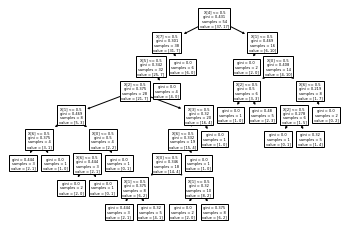

In [51]:
# visualize your tree using plot_tree inside sklearn (its version should be >= 0.21) and dtreeplt
tree.plot_tree(clf_id3)
# !pip install dtreeplt

#### KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
# classify test data with KNN classifier of sklearn (for each possible k value)
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train, y_train)
# calculate accuracy, error, recall, precision, sensitivity, specifity, f1 measure, confusion matrix  
#           based on your defined functions (using k=7)
y_pred_neigh = print(neigh.predict(x_test))
# plot test errors for each k

[0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
